# Imports

In [6]:
# common io modules
import os, glob
from pathlib import Path


# mandatory data science modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# p8-core and style
import p8
from p8.plot import style, correlations, descriptive, ml
style.set_default()

from plotly.offline import iplot
import plotly.graph_objects as go

from data import DATAPATH

In [434]:
from analysis import plot_season_overview, plot_team_overview

# Analysis


In [320]:
dataset_dict = pd.read_pickle(f'{DATAPATH}/dataset_dict.pkl')
df_datasets = pd.read_pickle(f'{DATAPATH}/df_datasets.pkl')

In [9]:
def get_dataset(dataset_dict, competition, season):
    return dataset_dict[competition][season]

#### Make plotly plot for league overview

In [222]:
from analysis import get_players_gd

In [241]:
df = get_dataset(dataset_dict, 'bundesliga', 2018)
#df = get_players_gd(df, method='gd90_per_game')
df_grouped = get_players_gd(df)

In [245]:
df_grouped.head()

gd_per_minute_sum  \
team           url                    name                           
1. FC Nürnberg bauer-robert-79879     Ro. Bauer          -0.343275   
               bredlow-fabian-82119   Bredlow            -0.232733   
               enrico-valentini-49958 Valentini          -0.199893   
               erras-patrick-80029    Erras              -1.221244   
               ewerton-70503          Ewerton            -0.156093   

                                                 duration_sum  \
team           url                    name                      
1. FC Nürnberg bauer-robert-79879     Ro. Bauer        1788.0   
               bredlow-fabian-82119   Bredlow          1127.0   
               enrico-valentini-49958 Valentini        1355.0   
               erras-patrick-80029    Erras            1228.0   
               ewerton-70503          Ewerton          1409.0   

                                                 goal_difference_sum  \
team           url                    name                             
1. FC Nürnberg bauer-robert-79879     Ro. Bauer                -31.0   
               bredlow-fabian-82119   Bredlow                  -19.0   
               enrico-valentini-49958 Valentini                -18.0   
               erras-patrick-80029    Erras                    -23.0   
               ewerton-70503          Ewerton                  -12.0   

                                                 gd_per_minute_mean  \
team           url                    name                            
1. FC Nürnberg bauer-robert-79879     Ro. Bauer           -0.016346   
               bredlow-fabian-82119   Bredlow             -0.017903   
               enrico-valentini-49958 Valentini           -0.014278   
               erras-patrick-80029    Erras               -0.064276   
               ewerton-70503          Ewerton             -0.009182   

                                                 duration_mean  \
team           url                    name                       
1. FC Nürnberg bauer-robert-79879     Ro. Bauer      81.272727   
               bredlow-fabian-82119   Bredlow        86.692308   
               enrico-valentini-49958 Valentini      90.333333   
               erras-patrick-80029    Erras          64.631579   
               ewerton-70503          Ewerton        78.277778   

                                                 goal_difference_mean  \
team           url                    name                              
1. FC Nürnberg bauer-robert-79879     Ro. Bauer             -1.476190   
               bredlow-fabian-82119   Bredlow               -1.461538   
               enrico-valentini-49958 Valentini             -1.285714   
               erras-patrick-80029    Erras                 -1.210526   
               ewerton-70503          Ewerton               -0.705882   

                                                 count_appearences  gd90_mean  \
team           url                    name                                      
1. FC Nürnberg bauer-robert-79879     Ro. Bauer                 22  -1.471178   
               bredlow-fabian-82119   Bredlow                   13  -1.611232   
               enrico-valentini-49958 Valentini                 15  -1.285030   
               erras-patrick-80029    Erras                     19  -5.784842   
               ewerton-70503          Ewerton                   18  -0.826374   

                                                 gd90_mean2  games_played  
team           url                    name                                 
1. FC Nürnberg bauer-robert-79879     Ro. Bauer   -1.634708     19.866667  
               bredlow-fabian-82119   Bredlow     -1.517303     12.522222  
               enrico-valentini-49958 Valentini   -1.280970     15.055556  
               erras-patrick-80029    Erras       -1.685668     13.644444  
               ewerton-70503          Ewerton     -0.811589     15.655556

In [428]:
from data import (
    get_competition_df,
    get_season_df,
    get_team_df,
    get_player_df,
)
from analysis import (
    plot_season_overview)

In [430]:
fig = plot_season_overview(df_datasets, 'Bundesliga', '2018-19')

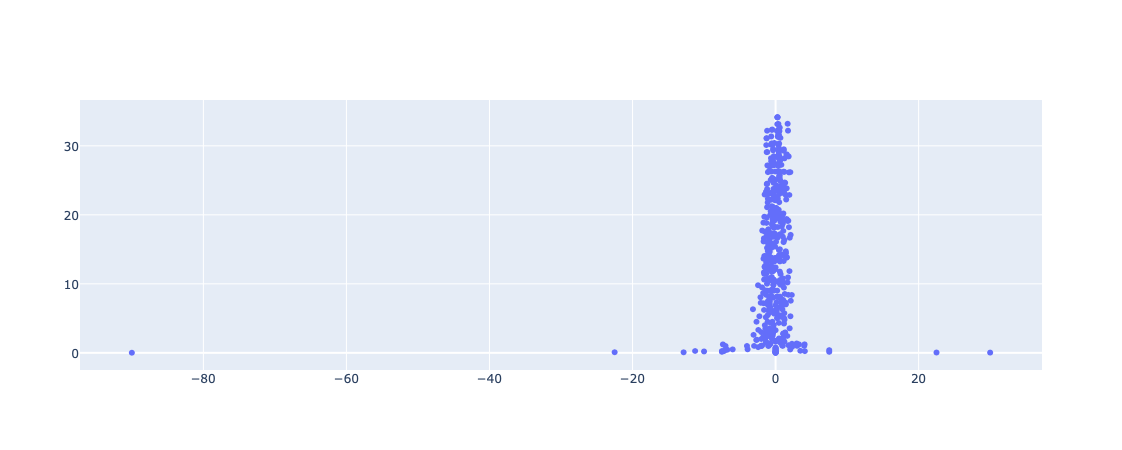

In [431]:
iplot(fig)

#### First analysis with single dataset

In [411]:
df_players = pd.read_pickle('../data/df_players_Bundesliga_2018-19.pkl')

In [412]:
df_players['gd_per_minute'] = df_players['goal_difference'] / df_players['duration']

In [413]:
df_grouped = df_players.groupby(['team', 'name'])['goal_difference', 'duration', 'gd_per_minute'].sum()
df_grouped['gd_per_minute_new'] = df_grouped['goal_difference'] / df_grouped['duration']
df_grouped['games_played'] = df_grouped['duration'] / 90

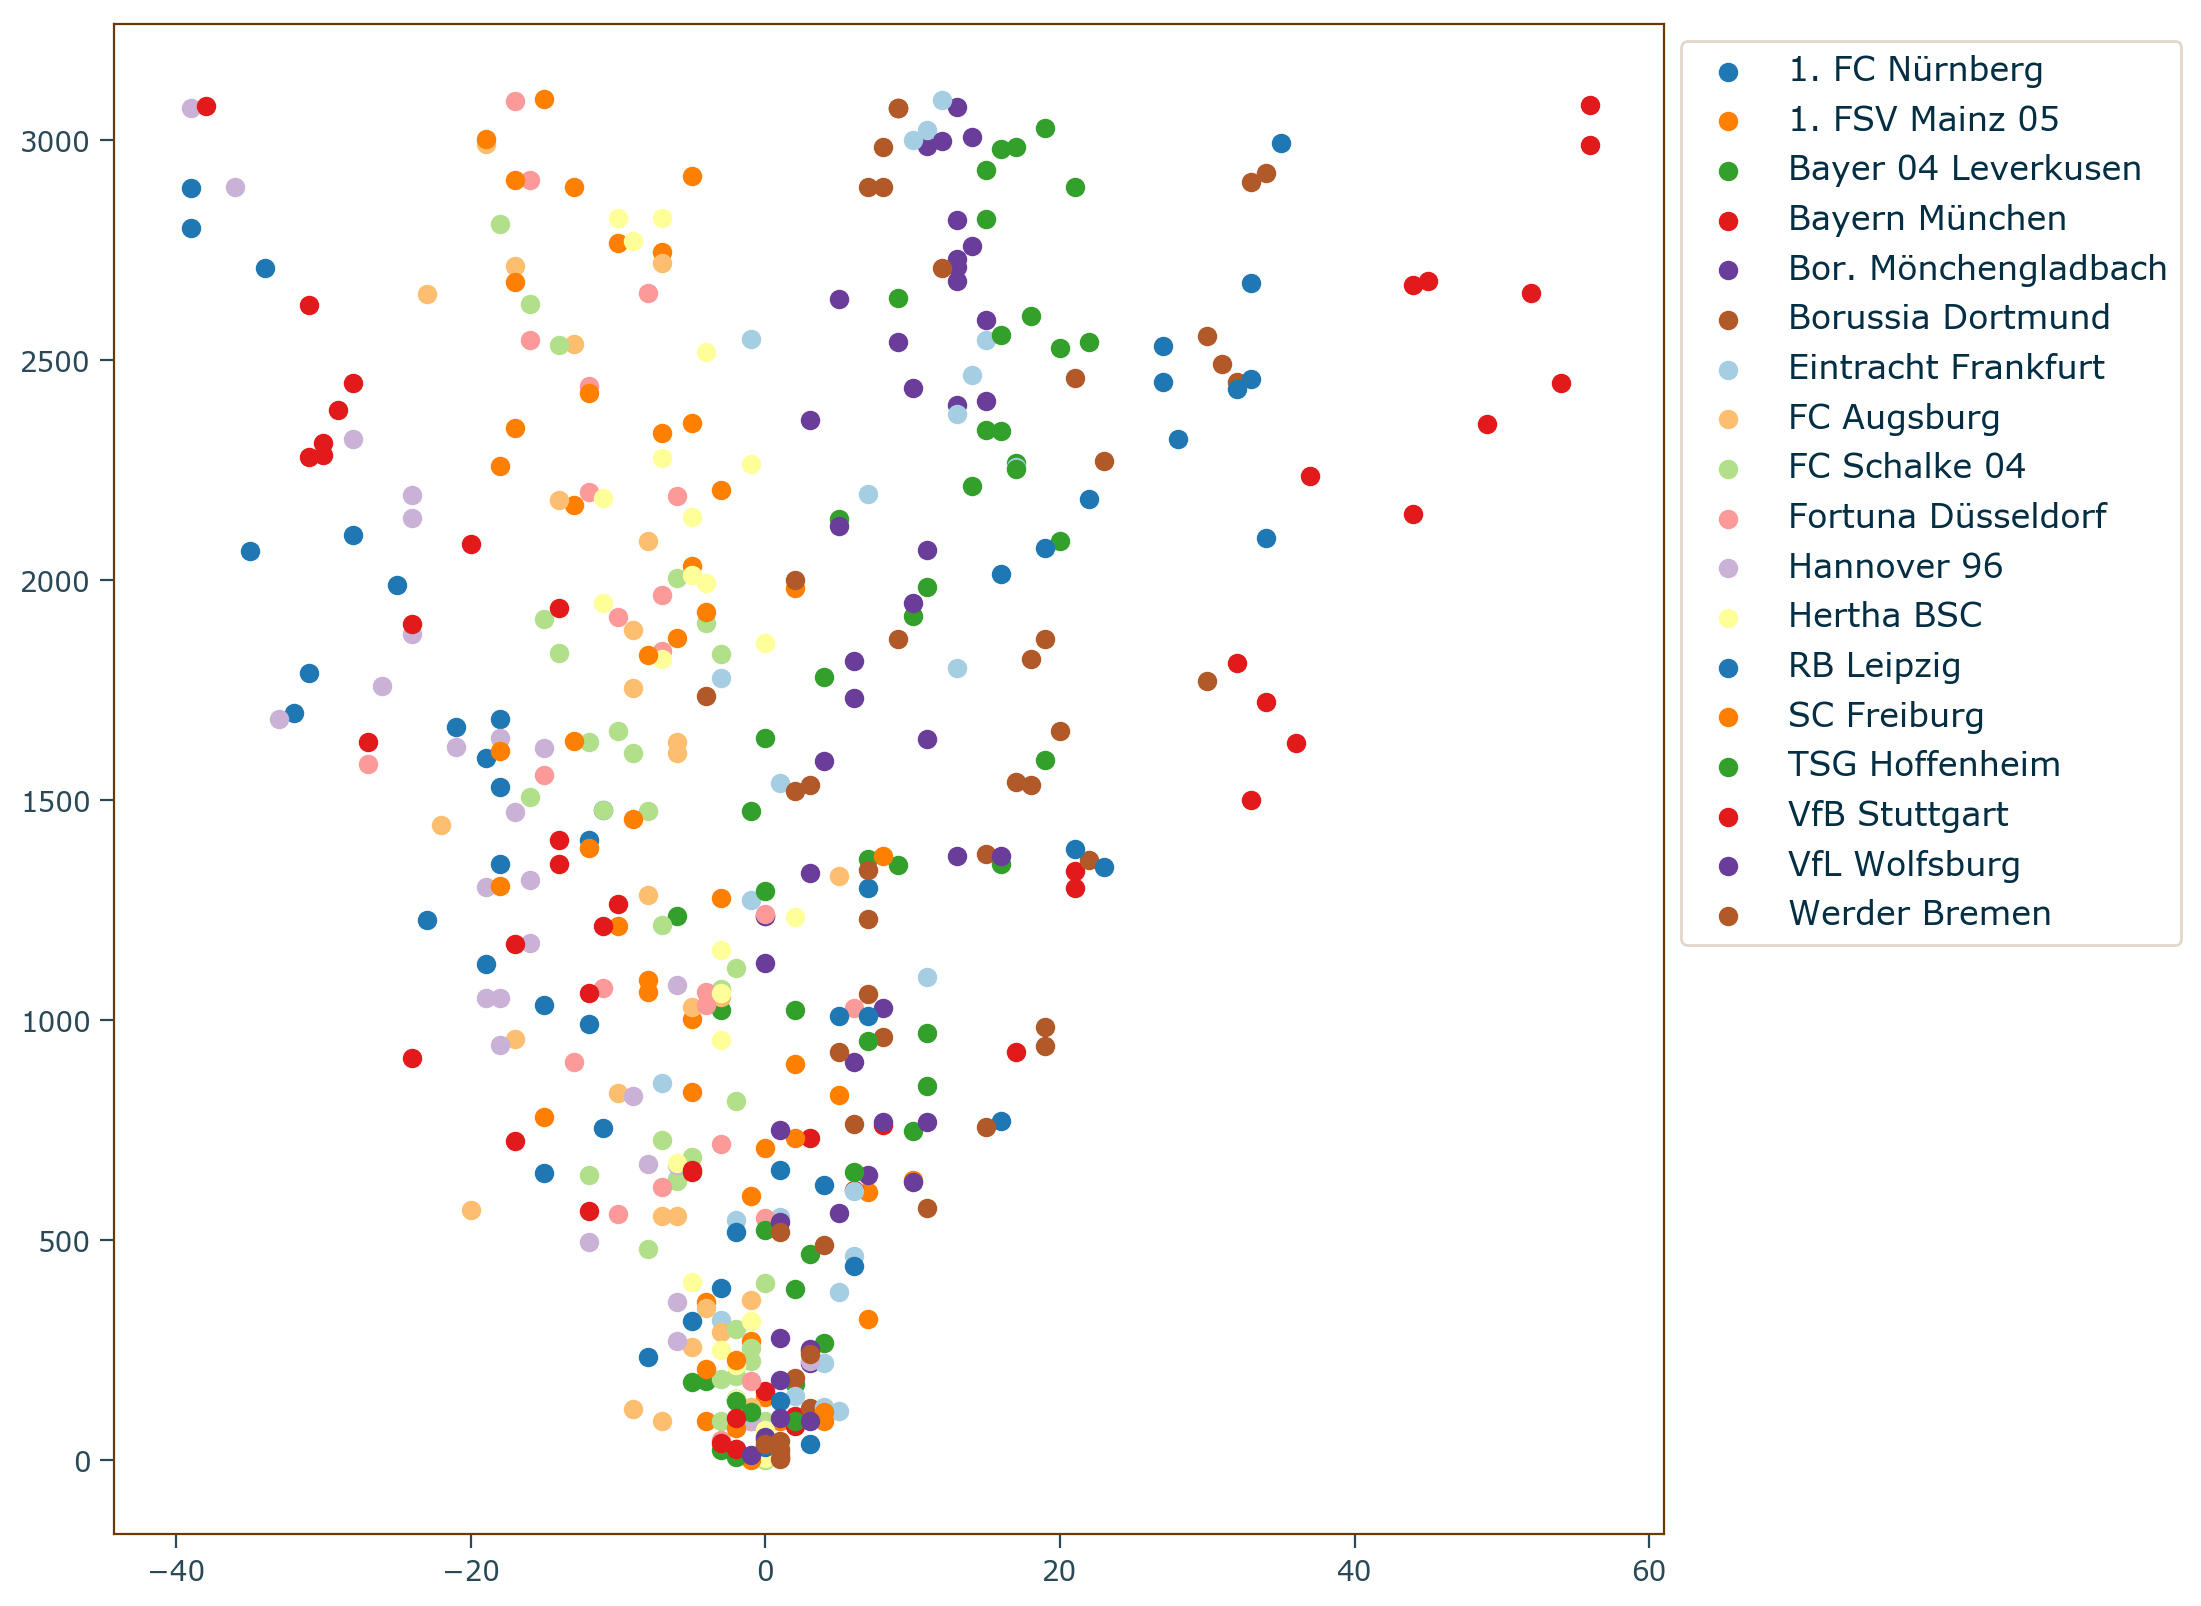

In [414]:
plt.figure(figsize=(10, 10))
for team in df_grouped.index.get_level_values(0).unique():
    df_team = df_grouped[df_grouped.index.get_level_values(0) == team]
    plt.scatter(df_team['goal_difference'], df_team['duration'], label=team)

plt.legend(bbox_to_anchor=(1.0, 1.0))

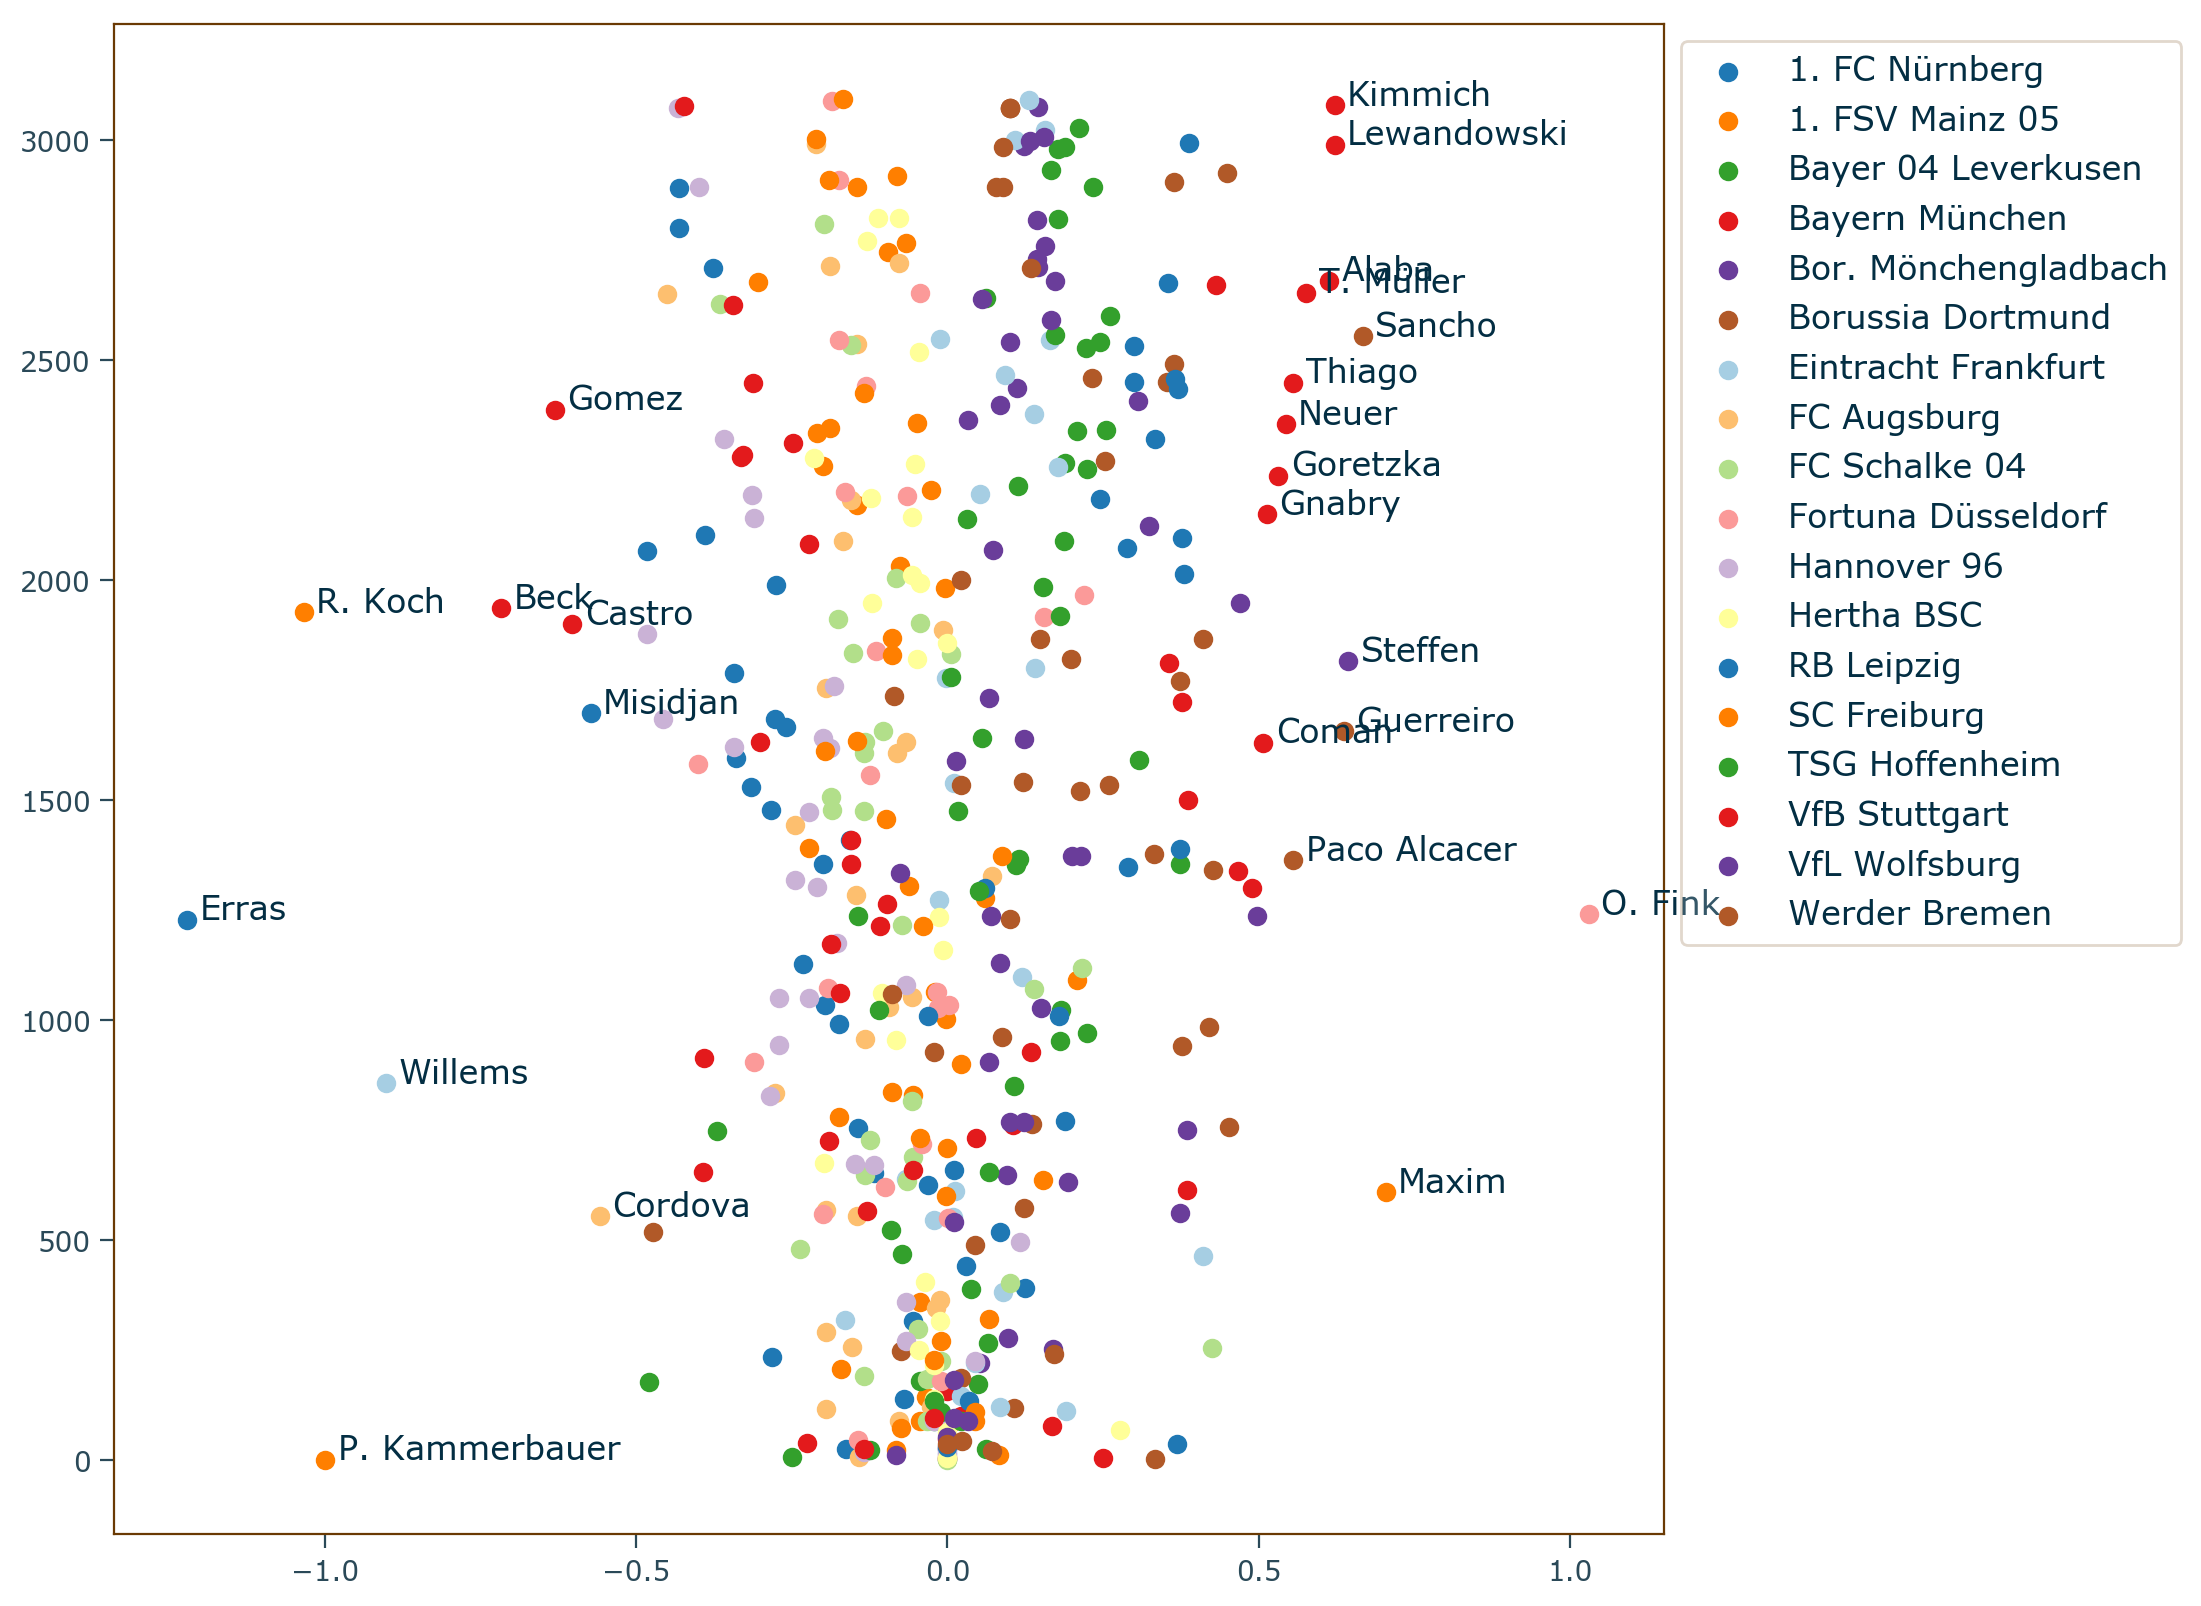

In [415]:
plt.figure(figsize=(10, 10))
for team in df_grouped.index.get_level_values(0).unique():
    df_team = df_grouped[df_grouped.index.get_level_values(0) == team]
    plt.scatter(df_team['gd_per_minute'], df_team['duration'], label=team)

for (team, name), values in df_grouped[df_grouped['gd_per_minute'].abs() > 0.5][['gd_per_minute', 'duration']].iterrows():
    plt.annotate(name, xy=values+0.02)
    
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [419]:
team = 'Bor. Mönchengladbach'
column = 'gd_per_minute'

In [ ]:
def plot_team_overview(df, team):
    get_players_gd(df)
    

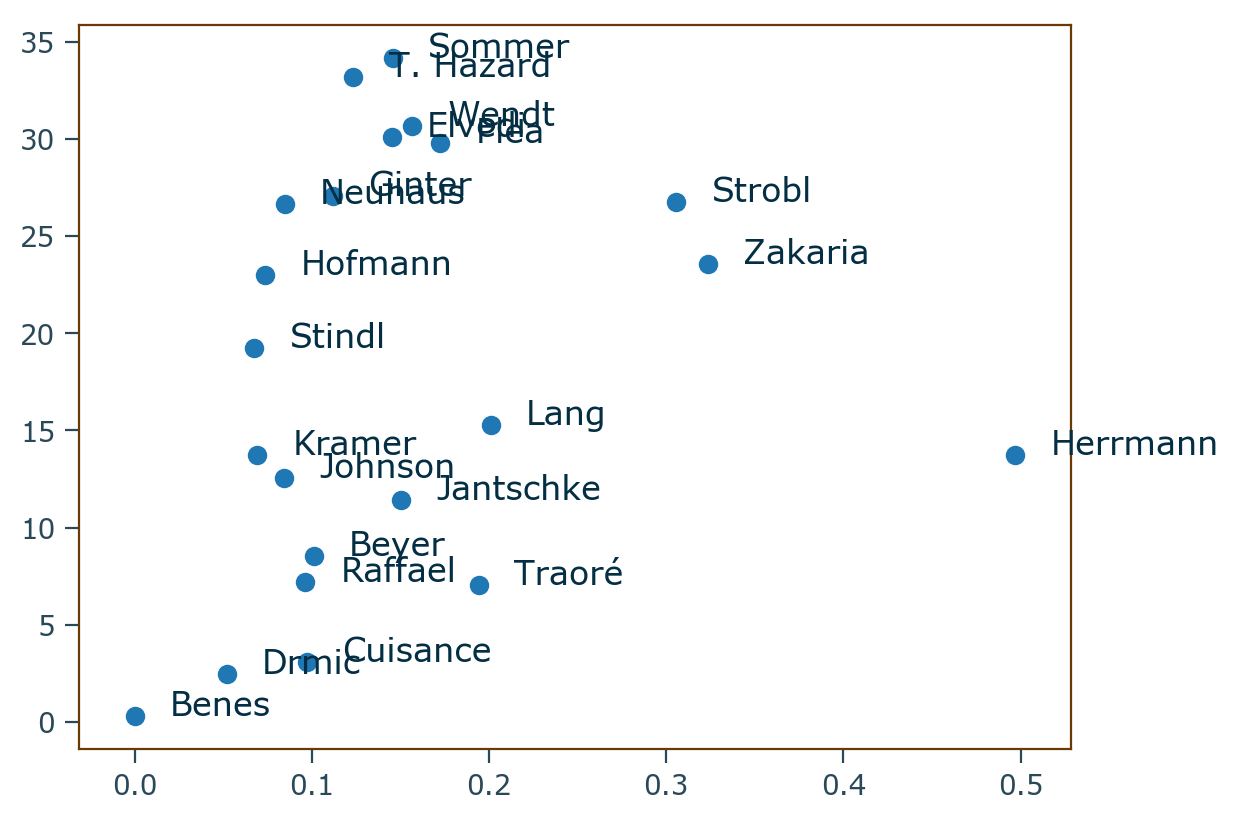

(-0.0, 1.0)

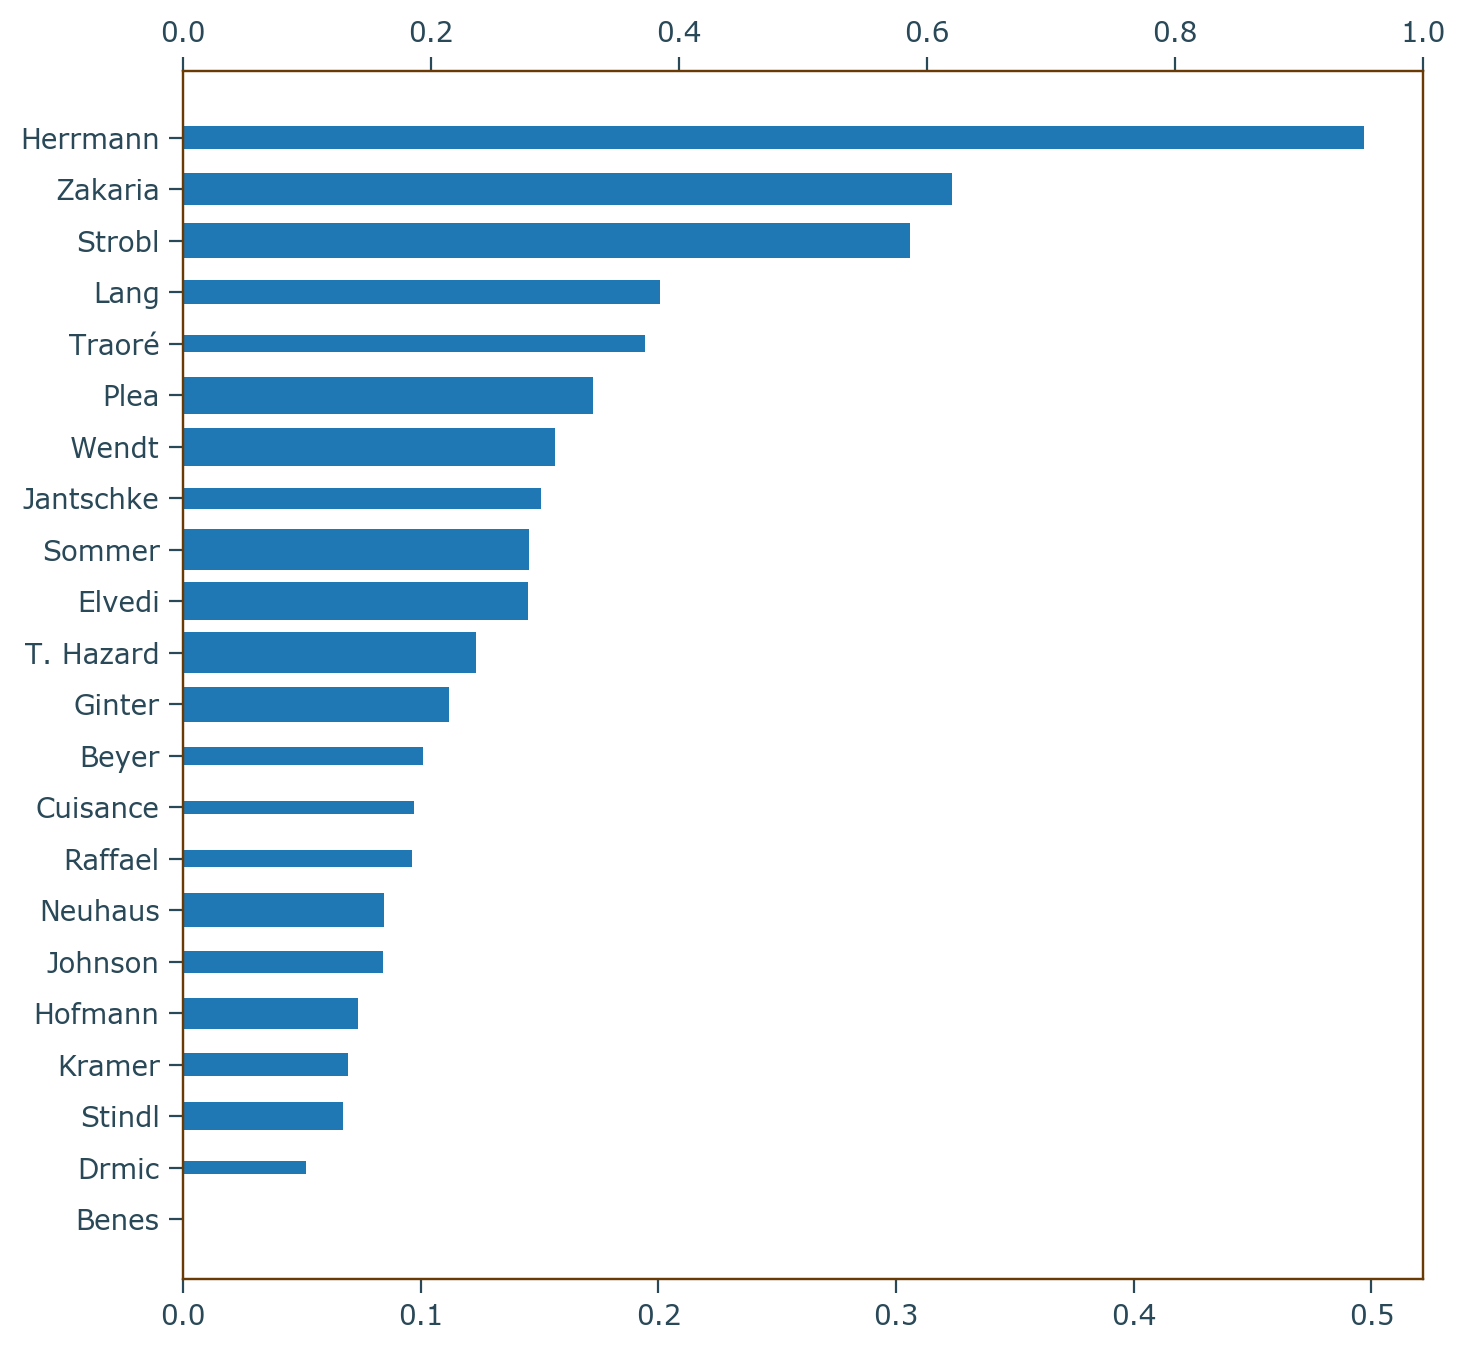

In [420]:
df_team = df_grouped[df_grouped.index.get_level_values(0) == team]
plt.scatter(df_team[column], df_team['games_played'], label=team)
for (team, name), values in df_team[[column, 'games_played']].iterrows():
    plt.annotate(name, xy=values+0.02)
plt.show()

df_sorted = df_team.sort_values(column)
games_played = df_sorted['games_played']

plt.figure(figsize=(8, 8))
plt.barh(y=df_sorted.index.get_level_values(1), width=df_sorted[column], height=0.2 + 0.6*((games_played / 34)))
ax = plt.gca()
ax2 = plt.twiny()
xmin, xmax = ax.get_xlim()
negative_percentage = abs(xmin / (xmax - xmin))

#ax2.barh(y=df_sorted.index.get_level_values(1), width=, color='red', alpha=0.2)

xmin2, xmax2 = ax2.get_xlim()
ax2.set_xlim(-negative_percentage * (xmax2 - xmin2), xmax2)

In [421]:
df_grouped[df_grouped['duration'] > 900].sort_values('gd_per_minute', ascending=False)

goal_difference  duration  gd_per_minute  \
team                 name                                                      
Fortuna Düsseldorf   O. Fink                    0.0    1240.0       1.030556   
Borussia Dortmund    Sancho                    30.0    2554.0       0.667184   
VfL Wolfsburg        Steffen                    6.0    1816.0       0.644221   
Borussia Dortmund    Guerreiro                 20.0    1657.0       0.636422   
Bayern München       Kimmich                   56.0    3079.0       0.621957   
                     Lewandowski               56.0    2989.0       0.621957   
                     Alaba                     45.0    2680.0       0.613624   
                     T. Müller                 52.0    2653.0       0.576796   
Borussia Dortmund    Paco Alcacer              22.0    1364.0       0.555362   
Bayern München       Thiago                    54.0    2448.0       0.555320   
                     Neuer                     49.0    2354.0       0.543463   
                     Goretzka                  37.0    2237.0       0.531595   
                     Gnabry                    44.0    2150.0       0.513166   
                     Coman                     36.0    1630.0       0.507392   
Bor. Mönchengladbach Herrmann                   0.0    1236.0       0.496977   
Bayern München       James                     21.0    1301.0       0.489760   
VfL Wolfsburg        Mehmedi                   10.0    1947.0       0.469603   
Bayern München       Ribéry                    21.0    1338.0       0.466326   
Borussia Dortmund    Witsel                    34.0    2925.0       0.448548   
Bayern München       Süle                      44.0    2671.0       0.430846   
Werder Bremen        J. Eggestein               7.0    1340.0       0.425935   
Borussia Dortmund    Pulisic                   19.0     984.0       0.420492   
                     M. Götze                  19.0    1867.0       0.411277   
RB Leipzig           Gulacsi                   35.0    2994.0       0.387933   
Bayern München       Javi Martinez             33.0    1501.0       0.386478   
RB Leipzig           Laimer                    16.0    2014.0       0.379519   
Bayern München       J. Boateng                34.0    1723.0       0.377528   
Borussia Dortmund    Philipp                   19.0     941.0       0.377489   
RB Leipzig           Orban                     34.0    2096.0       0.376702   
Bayer 04 Leverkusen  Alario                    16.0    1354.0       0.374379   
...                                             ...       ...            ...   
VfB Stuttgart        Ascacibar                -28.0    2447.0      -0.311668   
Hannover 96          Haraguchi                -24.0    2194.0      -0.314260   
1. FC Nürnberg       Kubo                     -18.0    1530.0      -0.315400   
VfB Stuttgart        Gentner                  -30.0    2284.0      -0.328081   
                     Insua                    -31.0    2280.0      -0.331857   
1. FC Nürnberg       Kerk                     -19.0    1596.0      -0.339403   
                     Ro. Bauer                -31.0    1788.0      -0.343275   
Hannover 96          Bakalorz                 -21.0    1620.0      -0.343281   
VfB Stuttgart        Pavard                   -31.0    2625.0      -0.345245   
Hannover 96          Schwegler                -28.0    2321.0      -0.358547   
FC Schalke 04        Sané                     -16.0    2627.0      -0.364879   
1. FC Nürnberg       Behrens                  -34.0    2710.0      -0.376502   
                     Ishak                    -28.0    2102.0      -0.389646   
VfB Stuttgart        Thommy                   -24.0     915.0      -0.390482   
Hannover 96          Esser                    -36.0    2892.0      -0.398909   
Fortuna Düsseldorf   Morales                  -27.0    1583.0      -0.400287   
VfB Stuttgart        Zieler                   -38.0    3077.0      -0.422779   
1. FC Nürnberg       Leibold        

#### Build dash app and first plots

In [405]:
import jupyterlab_dash
from dash.dependencies import Input, Output, State
import dash_html_components as html
import dash_core_components as dcc

viewer = jupyterlab_dash.AppViewer(port=8049)


In [386]:
def get_dash_dropdown_options(value_list):
    return [{'label': value, 'value': value} for value in value_list]

In [387]:
df_datasets = df_datasets.dropna(subset=['goal_difference'])

In [388]:
competitions = get_dash_dropdown_options(df_datasets['competition'].unique())

In [389]:
seasons = get_dash_dropdown_options(df_datasets['year'].unique())

In [390]:
competitions

[{'label': 'LaLiga', 'value': 'LaLiga'},
 {'label': 'PremierLeague', 'value': 'PremierLeague'},
 {'label': 'SerieA', 'value': 'SerieA'},
 {'label': 'Bundesliga', 'value': 'Bundesliga'}]

In [440]:
app = dash.Dash(__name__)

app.layout = html.Div(children=[
    dcc.Dropdown(id='dropdown-competition', options=competitions, value='Bundesliga'),
    dcc.Dropdown(id='dropdown-season', options=seasons, value='2018-19'),
    dcc.Dropdown(id='dropdown-team'),
    dcc.Dropdown(id='dropdown-player'),
    html.Div('C 2'),
    dcc.Graph(id='graph-season-overview'),
    dcc.Graph(id='graph-team-overview'),
])


@app.callback(
    Output('graph-season-overview', 'figure'),
    [Input('dropdown-competition', 'value'),
    Input('dropdown-season', 'value')])
def update_season_overview(competition, season):
    if competition and season:
        return plot_season_overview(df_datasets, competition, season)
    else:
        return []
    
@app.callback(
    Output('graph-team-overview', 'figure'),
    [Input('dropdown-team', 'value')],
    [State('dropdown-competition', 'value'),
     State('dropdown-season', 'value')]
)
def update_team_overview(team, competition, season):
    if team and competition and season:
        return plot_team_overview(
            df=df_datasets, 
            team=team,
            competition=competition, 
            season=season,
        )
    else:
        return []
    
@app.callback(
    Output('dropdown-team', 'options'),
    [Input('dropdown-season', 'value')],
    [State('dropdown-competition', 'value')]
)
def update_dropdown_team_options(season, competition):
    if season and competition:
        df = get_competition_df(df_datasets, competition)
        df = get_season_df(df, season)
        return get_dash_dropdown_options(sorted(df['team'].unique()))

    else:
        return []

viewer.show(app)